In [23]:
# Check if all dependencies are installed and if not install them
install_dependencies <- function(dependencies){
    
    installed <- installed.packages()[,"Package"]
    
    to_install <- dependencies[!(dependencies %in% installed)]
    
    if(length(to_install) > 0){install.packages(to_install)}
    
    sapply(dependencies, require, character.only = TRUE)
    
 
}

# Specify the dependencies here
dependencies <- c("tidyverse")

# Install dependencies
install_dependencies(dependencies)

tidyverse 
     TRUE

In [25]:
# Load data
load_data <- function(data_path){
    
    df <- read.table(data_path,header=TRUE)
    
    return(df)
}

# Store data path
data_path <- './data/treevol.dat'

# Load data
df <- load_data(data_path)

# Show data
df

DBH,D16,HT,VOL
<dbl>,<dbl>,<dbl>,<dbl>
10.20,9.3,89.00,25.93
13.72,12.1,90.07,45.87
15.43,13.3,95.08,56.20
14.37,13.4,98.03,58.60
15.00,14.2,99.00,63.36
15.02,12.8,91.05,46.35
15.12,14.0,105.60,68.99
15.24,13.5,100.80,62.91
15.24,14.0,94.00,58.13


In [26]:
# Label group variable in data
transform_vars <- function(df){
    
    logHT <- log(df$HT)
    logD16 <- log(df$D16)
    logVOL <- log(df$VOL) 
    
    df_clean <- data.frame(cbind(logVOL,logHT,logD16))
    
    return(df_clean)
      
}

# Store clean data
df_clean <- transform_vars(df)

df_clean

logVOL,logHT,logD16
<dbl>,<dbl>,<dbl>
3.255401,4.488636,2.230014
3.825811,4.500587,2.493205
4.028917,4.554719,2.587764
4.070735,4.585274,2.595255
4.148833,4.595120,2.653242
3.836221,4.511409,2.549445
4.233962,4.659658,2.639057
4.141705,4.613138,2.602690
4.062682,4.543295,2.639057


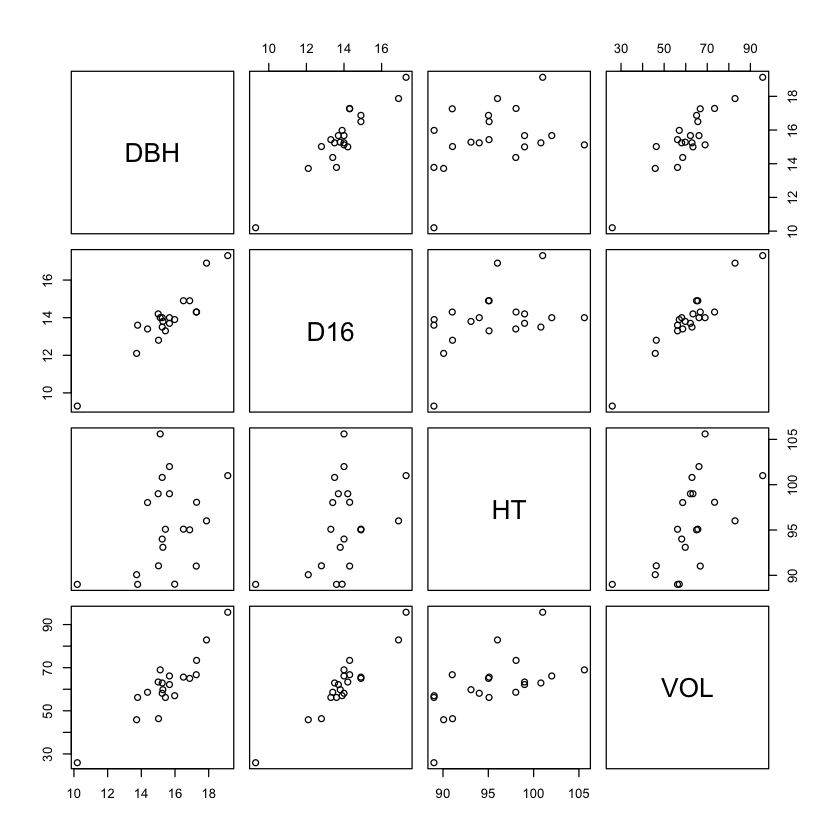

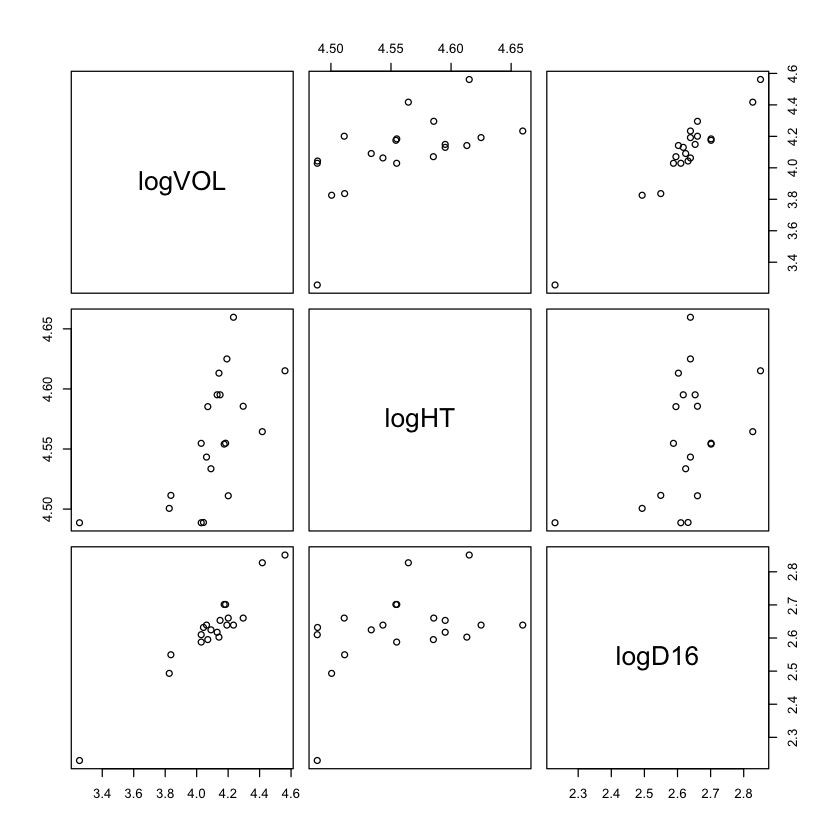

In [27]:
# Make a scatter plot
get_scatter <- function(df){
    
    pairs(df)
    
}

# These are for the raw variables
get_scatter(df)

# These are for the transformed variables
get_scatter(df_clean)

In [29]:
# Run linear model 
run_linear_model <- function(df){
    
    model <- lm(VOL ~ HT + D16, data = df)
    
    return(model)
     
}

linear_model <- run_linear_model(df)

summary(linear_model)


Call:
lm(formula = VOL ~ HT + D16, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2309 -1.8386 -0.4012  1.0922  6.9373 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -105.9027    14.6520  -7.228 1.41e-06 ***
HT             0.6765     0.1698   3.985 0.000959 ***
D16            7.4128     0.5088  14.568 4.92e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.23 on 17 degrees of freedom
Multiple R-squared:  0.9526,	Adjusted R-squared:  0.9471 
F-statistic: 170.9 on 2 and 17 DF,  p-value: 5.515e-12


In [30]:
# Run the transformed model
run_transformed_model<- function(df){
    
    transformed_model <- lm(logVOL ~ logHT + logD16, data = df)
    
    return(transformed_model)
}

transformed_model <- run_transformed_model(df_clean)

summary(transformed_model)


Call:
lm(formula = logVOL ~ logHT + logD16, data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.069602 -0.040922  0.002851  0.024690  0.106917 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -5.6243     1.0605  -5.304 5.83e-05 ***
logHT         1.0771     0.2532   4.255 0.000534 ***
logD16        1.8321     0.1034  17.713 2.16e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04976 on 17 degrees of freedom
Multiple R-squared:  0.9671,	Adjusted R-squared:  0.9632 
F-statistic: 249.9 on 2 and 17 DF,  p-value: 2.485e-13


In [63]:
# Get CIs/prediction intervals
predict_new_observation <- function(model, newtree, transformed=TRUE){
    
    row_labels <- c("Confidence", "Prediction")
    
    if (transformed == TRUE){
        
        lognewtree <- data.frame(logHT=log(newtree$HT),logD16=log(newtree$D16)) 
    
        transformed_ci <- predict(model,lognewtree,interval=c("confidence"),level=0.95)
    
        prediction_ci <- predict(model,lognewtree,interval=c("prediction"),level=0.95)
        
        transformed_preds <- data.frame(rbind(transformed_ci, prediction_ci))
        
        rownames(transformed_preds) <- row_labels
        
        return(transformed_preds)
        
        
    }
    
    else{
        
        linear_ci <- predict(model,newtree,interval=c("confidence"),level=0.95)
        
        prediction_ci <- predict(model,newtree,interval=c("prediction"),level=0.95)
        
        linear_preds <- data.frame(rbind(linear_ci, prediction_ci))
        
        rownames(linear_preds) <- row_labels
        
        return(linear_preds)
        
    }
    
    
} 


get_rescaled_preds<- function(transformed_preds){
    
    
    transformed_preds_exp <- data.frame(map(transformed_preds, exp))

    colnames(transformed_preds_exp) <- colnames(linear_preds)
    
    row_labels <- c("Confidence", "Prediction")
    
    rownames(transformed_preds_exp) <- row_labels

    return(transformed_preds_exp)    
    
}

newtree <- data.frame(HT=100,D16=10)

linear_preds <- predict_new_observation(linear_model, newtree, transformed=FALSE)

transformed_preds <- predict_new_observation(transformed_model, newtree, transformed=TRUE)

scaled_transformed_preds <- get_rescaled_preds(transformed_preds)

linear_preds

scaled_transformed_preds

,fit,lwr,upr
,<dbl>,<dbl>,<dbl>
Confidence,35.88012,30.56350,41.19674
Prediction,35.88012,27.23681,44.52344


,fit,lwr,upr
,<dbl>,<dbl>,<dbl>
Confidence,34.97218,32.02958,38.18513
Prediction,34.97218,30.49736,40.10359


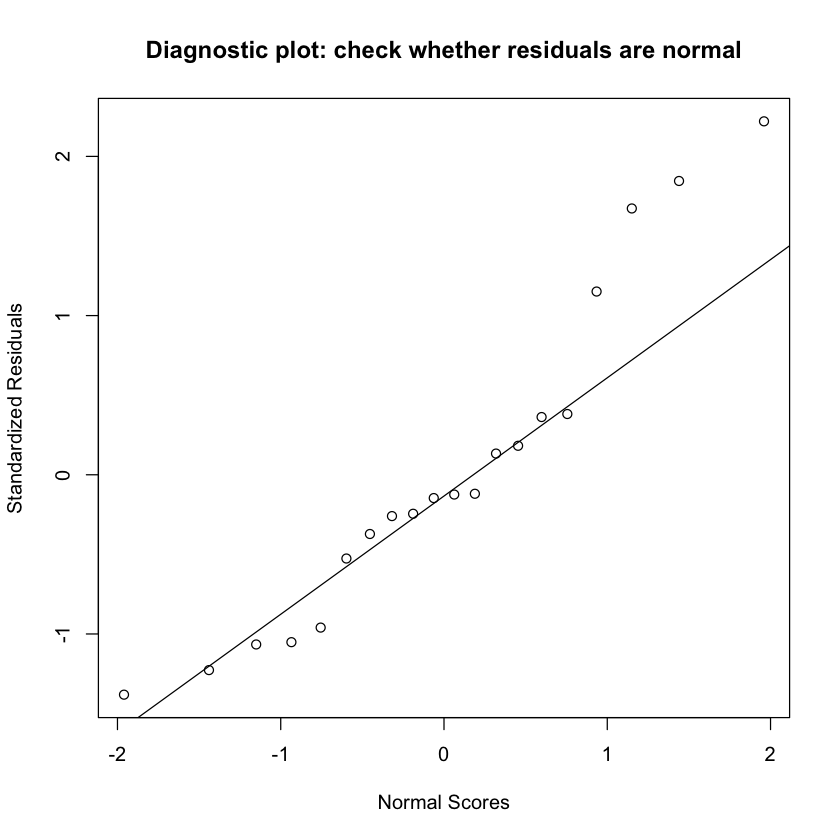

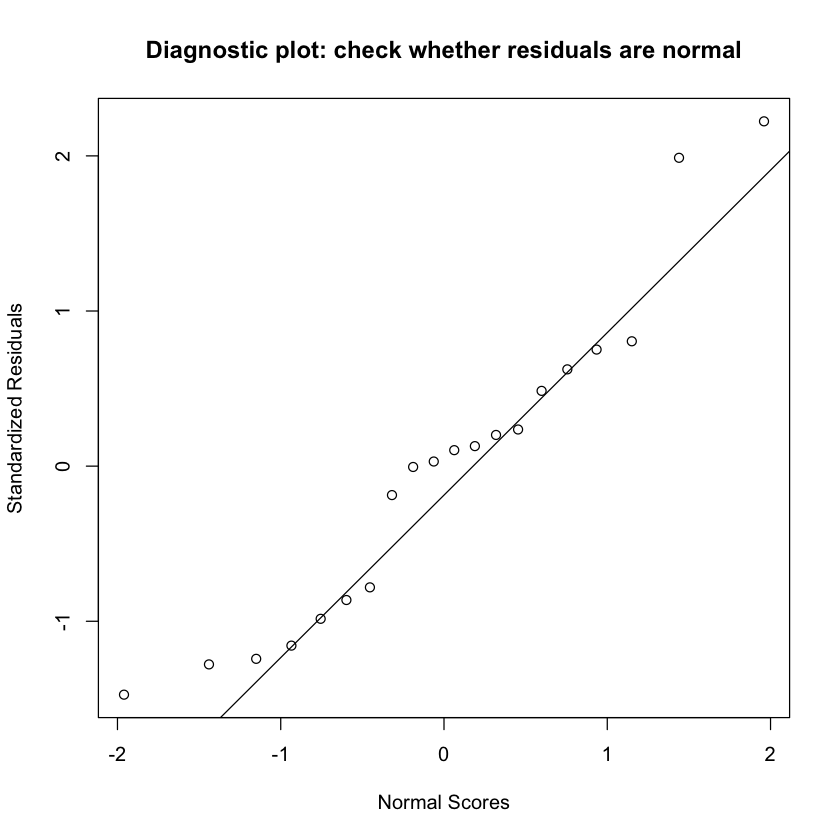

In [34]:
# Check model assumptions
check_normal_residuals <- function(model){
    
    stdres = rstandard(model)
    
    qqnorm(stdres, 
           ylab="Standardized Residuals", 
           xlab="Normal Scores", 
           main="Diagnostic plot: check whether residuals are normal") 
    
    qqline(stdres)
     
}

check_normal_residuals(linear_model)

check_normal_residuals(transformed_model)